In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [2]:
# Generate some data
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

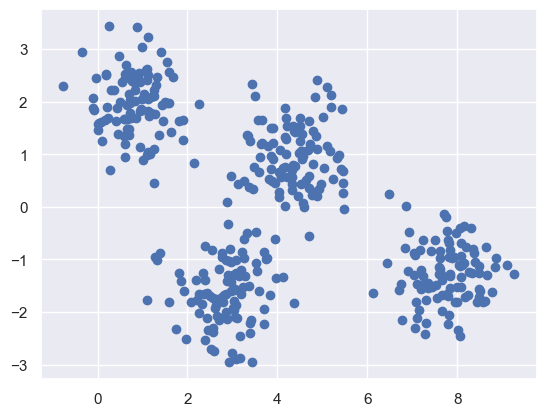

In [3]:
plt.scatter(X[:, 0], X[:, 1]);

In [37]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(xy=position, width=nsig * width, 
                             height=nsig * height, angle=angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.predict(X) # complete here
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor) # complete here

In [39]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0)
labels_kmeans = kmeans.fit_predict(X)

D:\Mas\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


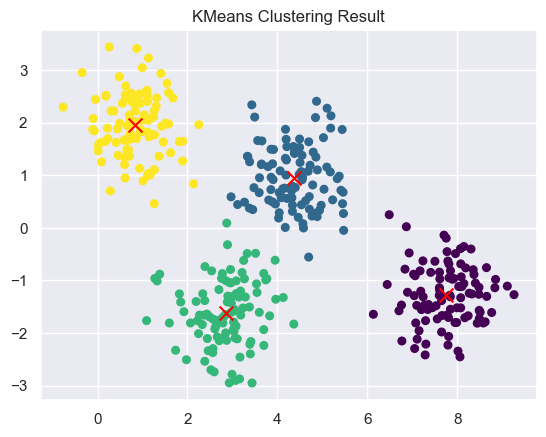

In [41]:
plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='x', s=100)
plt.title("KMeans Clustering Result")
plt.show()

D:\Mas\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


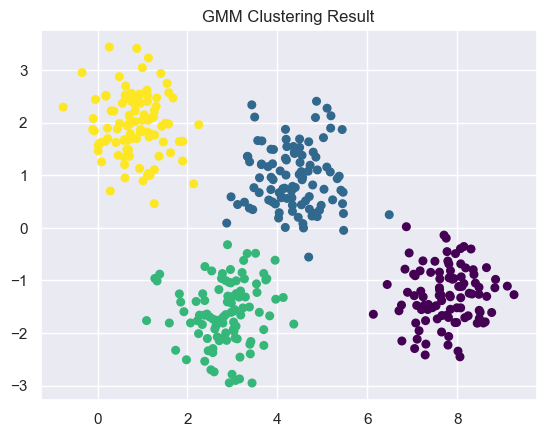

In [43]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=0)
gmm.fit(X)

labels_gmm = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels_gmm, cmap='viridis', s=30)
plt.title("GMM Clustering Result")
plt.show()

In [45]:
probs = gmm.predict_proba(X)
print(probs)

[[4.69238090e-01 5.30761633e-01 2.76240973e-07 1.75162717e-22]
 [1.97106146e-17 9.22826700e-10 9.99999999e-01 4.71110558e-15]
 [2.34875746e-14 2.09565089e-09 9.99999998e-01 3.07981606e-17]
 ...
 [2.32520153e-36 4.50722543e-08 2.15904343e-08 9.99999933e-01]
 [2.87688722e-15 5.36220515e-01 4.63399146e-01 3.80339560e-04]
 [1.10349655e-46 1.19335720e-11 6.20815080e-14 1.00000000e+00]]


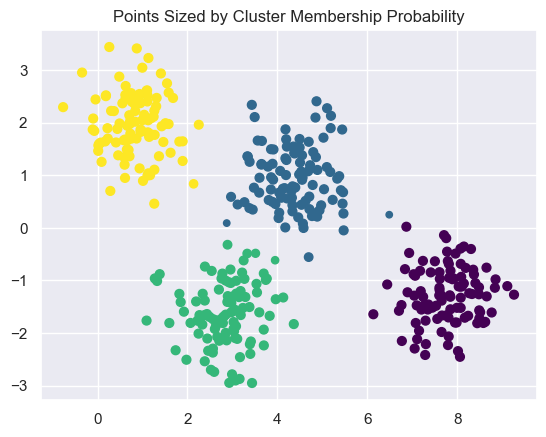

In [47]:
size = 40 * probs.max(axis=1)  # هرچه احتمال بیشتر، دایره بزرگ‌تر
plt.scatter(X[:, 0], X[:, 1], c=labels_gmm, s=size, cmap='viridis')
plt.title("Points Sized by Cluster Membership Probability")
plt.show()

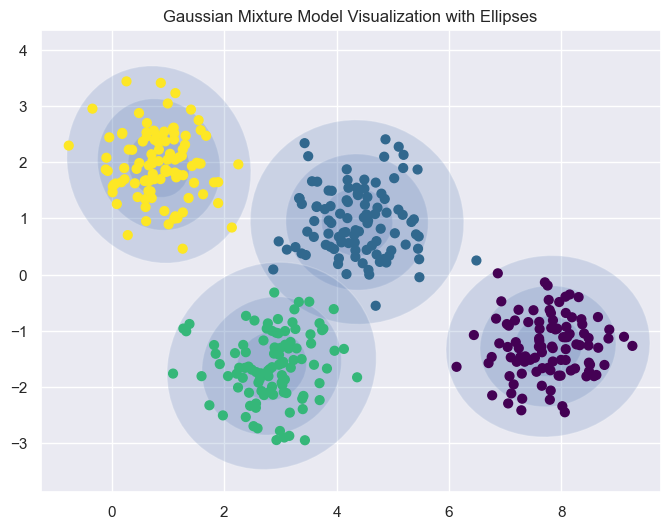

In [49]:
plt.figure(figsize=(8, 6))
plot_gmm(gmm, X, label=True)
plt.title("Gaussian Mixture Model Visualization with Ellipses")
plt.show()